In [1]:
import pandas as pd
import numpy as np
import os
PROJECT_DIR = '/home/shuang/projects/eqtm'

In [9]:
# read overlapping matrix
etCpG_filepath = os.path.join(PROJECT_DIR,'data','students', 'overlapMatrixEt.csv')
gtCpG_filepath = os.path.join(PROJECT_DIR,'data', 'students','overlapMatrixGt.csv')
# etCpG = pd.read_csv(etCpG_filepath,sep='\t')
# gtCpG = pd.read_csv(gtCpG_filepath,sep='\t')

# read zscore files
zscoreEt_filepath = os.path.join(PROJECT_DIR,'data','eqtmZscores','2017-12-09-eQTLsFDR-et0.0-flipped.txt')
zscoreGt_filepath = os.path.join(PROJECT_DIR,'data','eqtmZscores','2017-12-09-eQTLsFDR-gt0.0-flipped.txt')
# zscoreEt = pd.read_csv(zscoreEt_filepath,sep='\t')
# zscoreGt = pd.read_csv(zscoreGt_filepath,sep='\t')

# read zscore with tss distance files
zscoreTss_etPath = os.path.join(PROJECT_DIR,'data','output','et0.0-eQTMwithZscoreTssDistance.csv')
zscoreTss_gtPath = os.path.join(PROJECT_DIR,'data','output','gt0.0-eQTMwithZscoreTssDistance.csv')
# zscoreTss_et = pd.read_csv(zscoreTss_etPath)
# zscoreTss_gt = pd.read_csv(zscoreGt_filepath)

In [14]:
# modified for random file names
def changeCpGColumnName_addZscoreTss_forRandom(feature_file_path,feature_sep,zscore_path,zscore_sep):
    feature_file = pd.read_csv(feature_file_path, sep=feature_sep)
    feature_file = feature_file.rename(index=str,columns={'SNPName':'cpgName'})
    def read_zscore(zscore_path):
        zscore_file = pd.read_csv(zscore_path,sep=zscore_sep)

        zscore_file['cpgName'] = zscore_file[['SNPName']]
        zscore_dic = zscore_file.set_index('cpgName')['OverallZScore'].to_dict()
        tss_dic = zscore_file.set_index('cpgName')['TssDistance'].to_dict()
        return zscore_dic,tss_dic
    zscore_dic,tss_dic = read_zscore(zscore_path)
    def map_zscore(row):
        if row in zscore_dic:
            return zscore_dic[row]
        return None
    def map_tss(row):
        if row in tss_dic:
            return tss_dic[row]
        return None
    feature_file['zscore'] = feature_file['cpgName'].apply(map_zscore)
    feature_file['TssDistance'] = feature_file['cpgName'].apply(map_tss)
    return feature_file

In [2]:
# gt0.05 files
randomCpG_filepath = os.path.join(PROJECT_DIR,'output', 'random20000-eQTLsFDR-gt0.05-flipped_ratioTable.csv')
zscoreTss_randomPath = os.path.join(PROJECT_DIR,'data','output','gt0.05-eQTMwithZscoreTssDistance.csv')


In [7]:
randomCpG = pd.read_csv(randomCpG_filepath,sep='\t')
zscoreTss = pd.read_csv(zscoreTss_randomPath,sep=',')
randomCpG.rename
randomCpG.head()

,SNPName,H4K5ac,H2A.Z,H2BK120ac,H3K79me2,H3K27ac,H2BK20ac,H3K14ac,H3K9ac,H4K20me1,...,H2BK15ac,H3K9me1,H3K4me2,H3K27me3,H3K79me1,H2AK9ac,H3T11ph,H4K8ac,H4K91ac,H3K56ac
0,cg08487581,0.141732,0.110236,0.133858,0.000000,0.141732,0.070866,0.133858,0.039370,0.047244,...,0.007874,0.000000,0.125984,0.732283,0.023622,0.062992,0.157480,0.141732,0.212598,0.015748
1,cg17861719,0.118110,0.259843,0.141732,0.039370,0.188976,0.047244,0.149606,0.078740,0.488189,...,0.023622,0.007874,0.244094,0.968504,0.047244,0.125984,0.165354,0.220472,0.244094,0.023622
2,cg12982090,0.086614,0.015748,0.102362,0.070866,0.149606,0.078740,0.094488,0.086614,0.062992,...,0.015748,0.000000,0.062992,0.637795,0.086614,0.078740,0.094488,0.110236,0.133858,0.031496
3,cg24019568,0.007874,0.000000,0.007874,0.000000,0.000000,0.000000,0.007874,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007874,0.007874,0.007874,0.000000
4,cg23922819,0.496063,0.338583,0.566929,0.763780,0.669291,0.267717,0.559055,0.370079,0.314961,...,0.157480,0.000000,0.574803,0.267717,0.716535,0.149606,0.433071,0.622047,0.614173,0.204724


In [10]:
zscoreTss.head()

,PValue,SNPName,SNPChr,SNPChrPos,ProbeName,ProbeChr,ProbeCenterChrPos,CisTrans,SNPType,AlleleAssessed,...,HGNCName,IncludedDatasetsCorrelationCoefficient,Meta-Beta (SE),Beta (SE),FoldChange,FDR,TssSite,chr,TssDistance,checkChr
0,0.780398,cg08487581,16,89100852,ENSG00000167526,16,89629007,cis,C/T,C,...,RPL13,0.0872646;-0.0094275;-0.0499483;0.0222515;-0.0...,0E0 (0E0),0.0872646 (0.0424005);-0.0094275 (0.036784);-0...,0;0;0;0;0;0,0.978544,89627065,16,526213,True
1,0.501329,cg17861719,15,40576538,ENSG00000128928,15,40712916,cis,C/T,C,...,IVD,0.058313;0.015161;-0.0470243;-0.0199821;0.0128...,0E0 (0E0),0.058313 (0.0424904);0.015161 (0.0367814);-0.0...,0;0;0;0;0;0,0.932970,40697686,15,121148,True
2,0.757626,cg12982090,3,42733453,ENSG00000182606,3,42161337,cis,C/T,C,...,TRAK1,0.0347595;-0.0516952;-0.0141682;0.0182585;0.06...,0E0 (0E0),0.0347595 (0.0425371);-0.0516952 (0.0367364);-...,0;0;0;0;0;0,0.975801,42055294,3,678159,True
3,0.272729,cg24019568,6,53014525,ENSG00000223622,6,52674334,cis,C/T,C,...,GSTA6P,-0.0092134;0.0087513;0.0066405;0.0240915;0.152...,0E0 (0E0),-0.0092134 (0.042561);0.0087513 (0.0367842);0....,0;0;0;0;0;0,0.860694,52678258,6,336267,True
4,0.268553,cg23922819,1,27335739,ENSG00000225886,1,27996383,cis,C/T,C,...,RP11-288L9.4,-0.0082391;-0.023417;0.0167354;-0.0657578;-0.0...,0E0 (0E0),-0.0082391 (0.0425614);-0.023417 (0.0367755);0...,0;0;0;0;0;0,0.858655,27995979,1,660240,True


In [9]:
zscoreTss.columns

Index(['PValue', 'SNPName', 'SNPChr', 'SNPChrPos', 'ProbeName', 'ProbeChr',
       'ProbeCenterChrPos', 'CisTrans', 'SNPType', 'AlleleAssessed',
       'OverallZScore', 'DatasetsWhereSNPProbePairIsAvailableAndPassesQC',
       'DatasetsZScores', 'DatasetsNrSamples',
       'IncludedDatasetsMeanProbeExpression',
       'IncludedDatasetsProbeExpressionVariance', 'HGNCName',
       'IncludedDatasetsCorrelationCoefficient', 'Meta-Beta (SE)', 'Beta (SE)',
       'FoldChange', 'FDR', 'TssSite', 'chr', 'TssDistance', 'checkChr'],
      dtype='object')

In [15]:
randomCpG = changeCpGColumnName_addZscoreTss_forRandom(randomCpG_filepath,
                                       '\t',
                                       zscoreTss_randomPath,
                                       ',')
randomCpG = randomCpG.dropna(axis=0)
print('randomCpG file',randomCpG.shape)
etCpG.to_csv(os.path.join(PROJECT_DIR,'data','dataReadyForModeling','etCpG_withZscoreTss.csv'))

randomCpG file (8028, 35)


In [16]:
randomCpG.head()

,cpgName,H4K5ac,H2A.Z,H2BK120ac,H3K79me2,H3K27ac,H2BK20ac,H3K14ac,H3K9ac,H4K20me1,...,H3K4me2,H3K27me3,H3K79me1,H2AK9ac,H3T11ph,H4K8ac,H4K91ac,H3K56ac,zscore,TssDistance
0,cg08487581,0.141732,0.110236,0.133858,0.000000,0.141732,0.070866,0.133858,0.039370,0.047244,...,0.125984,0.732283,0.023622,0.062992,0.157480,0.141732,0.212598,0.015748,0.278755,526213
1,cg17861719,0.118110,0.259843,0.141732,0.039370,0.188976,0.047244,0.149606,0.078740,0.488189,...,0.244094,0.968504,0.047244,0.125984,0.165354,0.220472,0.244094,0.023622,0.672539,121148
2,cg12982090,0.086614,0.015748,0.102362,0.070866,0.149606,0.078740,0.094488,0.086614,0.062992,...,0.062992,0.637795,0.086614,0.078740,0.094488,0.110236,0.133858,0.031496,-0.308768,678159
3,cg24019568,0.007874,0.000000,0.007874,0.000000,0.000000,0.000000,0.007874,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007874,0.007874,0.007874,0.000000,-1.096819,336267
4,cg23922819,0.496063,0.338583,0.566929,0.763780,0.669291,0.267717,0.559055,0.370079,0.314961,...,0.574803,0.267717,0.716535,0.149606,0.433071,0.622047,0.614173,0.204724,1.106383,660240


In [17]:
randomCpG.to_csv(os.path.join(PROJECT_DIR,'data','dataReadyForModeling','randomCpG_withZscoreTss.csv'))

# add both Zscore and Tss distance

In [18]:
def changeCpGColumnName_addZscoreTss(feature_file_path,feature_sep,zscore_path,zscore_sep):
    feature_file = pd.read_csv(feature_file_path, sep=feature_sep)
    feature_file = feature_file.rename(index=str,columns={'Unnamed: 0':'cpgName'})
    def read_zscore(zscore_path):
        zscore_file = pd.read_csv(zscore_path,sep=zscore_sep)

        zscore_file['cpgName'] = zscore_file[['SNPName',
                                              'ProbeName']].apply(lambda x: '_'.join(x),
                                                                  axis=1)
        zscore_dic = zscore_file.set_index('cpgName')['OverallZScore'].to_dict()
        tss_dic = zscore_file.set_index('cpgName')['TssDistance'].to_dict()
        return zscore_dic,tss_dic
    zscore_dic,tss_dic = read_zscore(zscore_path)
    def map_zscore(row):
        if row in zscore_dic:
            return zscore_dic[row]
        return None
    def map_tss(row):
        if row in tss_dic:
            return tss_dic[row]
        return None
    feature_file['zscore'] = feature_file['cpgName'].apply(map_zscore)
    feature_file['TssDistance'] = feature_file['cpgName'].apply(map_tss)
    return feature_file

In [23]:
# read etCpG files with all features
etCpG = changeCpGColumnName_addZscoreTss(etCpG_filepath,
                                       '\t',
                                       zscoreTss_etPath,
                                       ',')
etCpG = etCpG.dropna(axis=0)
print('etCpG file',etCpG.shape)
etCpG.head()
etCpG.to_csv(os.path.join(PROJECT_DIR,'data','dataReadyForModeling','etCpG_withZscoreTss.csv'))

# read gtCpG files with 8 features
gtCpG = changeCpGColumnName_addZscoreTss(gtCpG_filepath,
                                       '\t',
                                       zscoreTss_gtPath,
                                       ',')
gtCpG = gtCpG.dropna(axis=0)
print('gtCpG file',gtCpG.shape)
gtCpG.to_csv(os.path.join(PROJECT_DIR,'data','dataReadyForModeling','gtCpG_withZscoreTss.csv'))

etCpG file (7497, 35)
gtCpG file (28454, 35)


# only add zscore

In [ ]:
def changeCpGColumnName_addZscore2(feature_file_path,feature_sep,zscore_path,zscore_sep):
    feature_file = pd.read_csv(feature_file_path, sep=feature_sep)
    feature_file = feature_file.rename(index=str,columns={'Unnamed: 0':'cpgName'})
    def read_zscore(zscore_path):
        zscore_file = pd.read_csv(zscore_path,sep=zscore_sep)

        zscore_file['cpgName'] = zscore_file[['SNPName',
                                              'ProbeName']].apply(lambda x: '_'.join(x),
                                                                  axis=1)
        zscore_dic = zscore_file.set_index('cpgName')['OverallZScore'].to_dict()
        return zscore_dic
    zscore_dic,tss_dic = read_zscore(zscore_path)
    def map_zscore(row):
        if row in zscore_dic:
            return zscore_dic[row]
        return None
    feature_file['zscore'] = feature_file['cpgName'].apply(map_zscore,axis=1)
    feature_file['TssDistance'] = feature_file['cpgName'].apply(map_tss,axis=1)
    return feature_file

# read bonder files with 8 features
bonder_path = os.path.join(PROJECT_DIR,'data',
            'overlapratio_table_Bonder_ImputedGapped_unique_final_cpgs+feats+types+TSS.csv')
bonder_zscore_path = os.path.join(PROJECT_DIR,'data','eqtm',
                                  'bonder-eQTMsFDR0.0-CpGLevel-split-uniqueCGs.txt')

bonder = changeCpGColumnName_addZscore2(bonder_path,
                                       ',',
                                       bonder_zscore_path,
                                       '\t')
bonder = bonder.dropna(axis=0)
print('Bonder file',bonder.shape)
bonder.to_csv(os.path.join(PROJECT_DIR,'data','Newbonder_withzscore.csv'))

# read westra data with all features
westra_zscore_path = os.path.join(PROJECT_DIR,'data','eqtm',
                                  'westra-eQTMsFDR0.0-CpGLevel-split-uniqueCGs.txt')
westra_all_path = os.path.join(PROJECT_DIR,'data',
'overlapratio_table_Westra_ImputedGapped_unique_final_cpgs_All_roadmap_feats+types+TSS.csv')
westra_all = changeCpGColumnName_addZscore2(westra_all_path,
                                           '\t',
                                           westra_zscore_path,
                                           '\t')
_,col_1 = westra_all.shape
westra_all = westra_all.dropna(axis=0)
print("Westra file with all features of shape (%d, %d) deleted %d cpgs"%(westra_all.shape[0],
       westra_all.shape[1],
       westra_all.shape[1]-col_1))
westra_all.to_csv(os.path.join(PROJECT_DIR,'data',
                               'Newwestra_all_with_zscore.csv'))

# read westra file with 8 features
westra_bonderfeat_path = os.path.join(PROJECT_DIR,'data',
    'overlapratio_table_Westra_ImputedGapped_unique_final_cpgs_Bonder_feats+types+TSS.csv')
westra_bonderfeat = changeCpGColumnName_addZscore2(westra_bonderfeat_path,
                                                  '\t',
                                                  westra_zscore_path,
                                                  '\t')
_,col_1 = westra_bonderfeat.shape
westra_bonderfeat = westra_bonderfeat.dropna(axis=0)
print("Westra file with bonderfeatures of shape (%d, %d), deleted %d cpgs"%(
    westra_bonderfeat.shape[0],westra_bonderfeat.shape[1],
    westra_bonderfeat.shape[1]-col_1))
westra_bonderfeat.to_csv(os.path.join(PROJECT_DIR,'data',
                                      'Newwestra_bonderfeat_with_zscore.csv'))

# deprecated

In [34]:
westra_zscore_path = os.path.join(PROJECT_DIR,'data','zScoresWestraFinalUnique.csv')
feature_file = pd.read_csv(westra_zscore_path, sep=',')
feature_file = feature_file.rename(index=str,columns={'Unnamed: 0':'cpgName'})

zscore_file = pd.read_csv(westra_zscore_path,sep=',')
zscore_file = zscore_file.rename(index=str,columns={'Unnamed: 0':'cpgName'})
def map_zscore(row):
    if row in zscore_dic:
        return zscore_dic[row]
    else:
        return None
feature_file['zscore'] = feature_file['cpgName'].apply(map_zscore)
def changeCpGColumnName_addZscore(feature_file_path,feature_sep,zscore_path,zscore_sep):
    feature_file = pd.read_csv(feature_file_path, sep=feature_sep)
#     print(feature_file.head())
    feature_file = feature_file.rename(index=str,columns={'Unnamed: 0':'cpgName'})
#     print(feature_file['cpgName'].head())
    def read_zscore(zscore_path):
        zscore_file = pd.read_csv(zscore_path,sep=zscore_sep)
        zscore_file = zscore_file.rename(index=str,
                                         columns={'Unnamed: 0':'cpgName'})
#         print(zscore_file['cpgName'].head())
        zscore_dic = zscore_file.set_index('cpgName')['z-score'].to_dict()
#         print(zscore_dic.keys())
        return zscore_dic
    zscore_dic = read_zscore(zscore_path)
    def map_zscore(row):
        if row in zscore_dic:
            return zscore_dic[row]
        else:
            return None
    feature_file['zscore'] = feature_file['cpgName'].apply(map_zscore)
    return feature_file

# read bonder files with 8 features
bonder_path = os.path.join(PROJECT_DIR,'data',
            'overlapratio_table_Bonder_ImputedGapped_unique_final_cpgs+feats+types+TSS.csv')
bonder_zscore_path = os.path.join(PROJECT_DIR,'data',
                                  'zScoresBonderFinalUnique.csv')
bonder = changeCpGColumnName_addZscore(bonder_path,
                                       ',',
                                       bonder_zscore_path,
                                       ',')
bonder = bonder.dropna(axis=0)
print('Bonder file',bonder.shape)
bonder.to_csv(os.path.join(PROJECT_DIR,'data','bonder_withzscore.csv'))

# read westra data with all features
westra_zscore_path = os.path.join(PROJECT_DIR,'data',
                                  'zScoresWestraFinalUnique.csv')
westra_all_path = os.path.join(PROJECT_DIR,'data',
'overlapratio_table_Westra_ImputedGapped_unique_final_cpgs_All_roadmap_feats+types+TSS.csv')
westra_all = changeCpGColumnName_addZscore(westra_all_path,
                                           '\t',
                                           westra_zscore_path,
                                           ',')
_,col_1 = westra_all.shape
westra_all = westra_all.dropna(axis=0)
print("Westra file with all features of shape (%d, %d) deleted %d cpgs"%(westra_all.shape[0],
       westra_all.shape[1],
       westra_all.shape[1]-col_1))
# westra_all.to_csv(os.path.join(PROJECT_DIR,'data','
# westra_all_with_zscore.csv'))

# read westra file with 8 features
westra_bonderfeat_path = os.path.join(PROJECT_DIR,'data',
    'overlapratio_table_Westra_ImputedGapped_unique_final_cpgs_Bonder_feats+types+TSS.csv')
westra_bonderfeat = changeCpGColumnName_addZscore(westra_bonderfeat_path,
                                                  '\t',
                                                  westra_zscore_path,
                                                  ',')
_,col_1 = westra_bonderfeat.shape
westra_bonderfeat = westra_bonderfeat.dropna(axis=0)
print("Westra file with bonderfeatures of shape (%d, %d), deleted %d cpgs"%(
    westra_bonderfeat.shape[0],westra_bonderfeat.shape[1],
    westra_bonderfeat.shape[1]-col_1))
# westra_bonderfeat.to_csv(os.path.join(PROJECT_DIR,'data',
# 'westra_bonderfeat_with_zscore.csv'))


Bonder file (2842, 9)
Westra file with all features of shape (3526, 35) deleted 0 cpgs
Westra file with bonderfeatures of shape (3526, 9), deleted 0 cpgs


In [35]:
# cpg zscore
zscore_path = os.path.join(PROJECT_DIR,'data','zScoresBonderFinalUnique.csv')
zscore_file = pd.read_csv(zscore_path,sep=',')
zscore_file.head()

,Unnamed: 0,z-score
0,cg08128007_ENSG00000188976,6.721807
1,cg23733394_ENSG00000188976,7.517455
2,cg13856810_ENSG00000188976,5.672401
3,cg06624358_ENSG00000188976,5.745242
4,cg14156792_ENSG00000188976,7.106451


In [2]:
data_path = os.path.join(PROJECT_DIR,'mj_data','Anno_Value_Direction.csv')
data_table = pd.read_csv(data_path,sep='\t')

In [3]:
data_table.shape

(75259, 359)

In [4]:
# display all column names
for i in range(0,data_table.shape[1],5):
    print(data_table.columns[i:i+5].values)

['HT12v4.ArrayAddress' 'Platform' 'Gene' 'Chr' 'ChrStart']
['ChrEnd' 'Probe' 'Seq' 'Infinium_Design_Type' 'UCSC_CpG_Islands_Name']
['Relation_to_UCSC_CpG_Island' 'In.Gene...Not.in.gene'
 'Distance.In.Gene.or.Closest.Downstream.Gene'
 'Bases.to.start.of.transctript' 'Bases.to.stop.of.transctript']
['Position1' 'Position2' 'GeneCentric' 'CGICentric' 'ChromatinState_E001']
['ChromatinState_E002' 'ChromatinState_E003' 'ChromatinState_E004'
 'ChromatinState_E005' 'ChromatinState_E006']
['ChromatinState_E007' 'ChromatinState_E008' 'ChromatinState_E009'
 'ChromatinState_E010' 'ChromatinState_E011']
['ChromatinState_E012' 'ChromatinState_E013' 'ChromatinState_E014'
 'ChromatinState_E015' 'ChromatinState_E016']
['ChromatinState_E017' 'ChromatinState_E018' 'ChromatinState_E019'
 'ChromatinState_E020' 'ChromatinState_E021']
['ChromatinState_E022' 'ChromatinState_E023' 'ChromatinState_E024'
 'ChromatinState_E025' 'ChromatinState_E026']
['ChromatinState_E027' 'ChromatinState_E028' 'ChromatinState_E

In [7]:
for col in data_table.columns:
    null = data_table[col].isnull().sum()
    if null > 0:
        print(col,null)

Gene 3064
UCSC_CpG_Islands_Name 29272
Relation_to_UCSC_CpG_Island 29272
HistoneMarks_E029 5444
HistoneMarks_E030 12359
HistoneMarks_E031 15367
HistoneMarks_E032 6700
HistoneMarks_E033 12529
HistoneMarks_E034 4589
HistoneMarks_E035 13736
HistoneMarks_E036 4832
HistoneMarks_E037 6066
HistoneMarks_E038 7965
HistoneMarks_E039 5815
HistoneMarks_E040 10462
HistoneMarks_E041 5596
HistoneMarks_E042 3966
HistoneMarks_E043 6284
HistoneMarks_E044 8126
HistoneMarks_E045 7831
HistoneMarks_E046 5613
HistoneMarks_E047 5057
HistoneMarks_E048 7480
HistoneMarks_E050 3519
HistoneMarks_E051 6417
HistoneMarks_E062 1026
HistoneMarks_E096 3081
HistoneMarks_E115 5619
HistoneMarks_E116 4875
HistoneMarks_E123 6901
HistoneMarks_E124 5274
NearestSNP 653
DistanceToNearestSNP 653
PValueOfNearestSNP 653
NumberOfSNPsInWindow 653
Chromosome 653
Majority_Blood_HistoneMark 3
TFBS 67376
ConservationScore 5204
HistoneMarks_gappedPeaks_E029 14638
HistoneMarks_gappedPeaks_E030 12435
HistoneMarks_gappedPeaks_E031 28842
Histo

In [41]:
import matplotlib.pyplot as plt
% matplotlib inline

In [55]:
def hist_compare(datatable_pd, col_name):
    '''
    compare the column(col_name) value for different classes
    in the database(datatable_pd) and plot histograms/bar plot 
    for the pathogenic and benign class
    
    currently only support 'Pathogenic' and 'Benign' classes
    no legend in the plot
    '''
    col = datatable_pd[col_name]
    col_patho = col[datatable_pd['zscore'] > 0]
    col_benig = col[datatable_pd['zscore'] < 0]
    if datatable_pd[col_name].dtype == np.object:
        x = datatable_pd[col_name].unique()
        y_path = []
        y_beni = []
        for name in x:
            y_name = datatable_pd['INFO'][datatable_pd[col_name]==name]
            y_path.append(y_name[y_name=='Pathogenic'].count())
            y_beni.append(y_name[y_name=='Benign'].count())
        plt.bar(x,y_path,alpha=0.5)
        plt.bar(x,y_beni,alpha=0.5)
    else:
        n,bins,patches = plt.hist(col_patho,25,alpha=0.5)
        n,bins,patches = plt.hist(col_benig,25,alpha=0.5)
    plt.show()

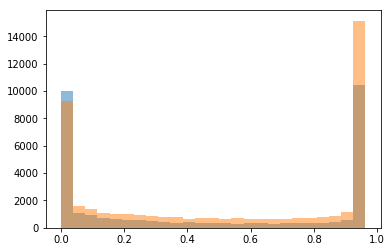

In [56]:
hist_compare(data_table,'X._H3K27ac_imputed_gappedPeaks')
# plt.hist(data_table['X._H3K27ac_imputed_gappedPeaks'])

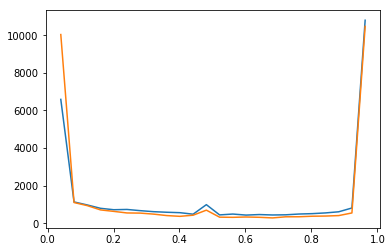

In [83]:
# tried to scale it but no it still inconsistent from the paper
col = data_table['X._H3K27ac_imputed_gappedPeaks']
col_patho = col[data_table['zscore'] < 0]
# print(data_table[['X._H3K27ac_imputed_gappedPeaks','zscore']].loc[data_table['zscore']<0])
col_benig = col[data_table['zscore'] > 0]

n_1, bins_1 = np.histogram(col_patho, bins=24)
# print(len(n),len(bins))
n_1 = n_1 * len(col_benig)/len(col_patho)
plt.plot(bins_1[1:],n_1)
n_2, bins_2 = np.histogram(col_benig, bins=24)
# print(len(n),len(bins))
plt.plot(bins_2[1:],n_2)

In [9]:
from sklearn.linear_model import ElasticNet


In [11]:
data_table.shape

(75259, 359)

In [13]:
model = ElasticNet()
model.fit(data_table[['X._H3K4me2_imputed_gappedPeaks','X._H3K4me3_imputed_gappedPeaks']], data_table['zscore'])

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
pred = model.predict(data_table[['X._H3K4me2_imputed_gappedPeaks','X._H3K4me3_imputed_gappedPeaks']])

In [16]:
pred.shape

(75259,)

In [3]:
from sklearn.manifold import TSNE

In [10]:
eqtm_data = pd.read_csv('mj_data/only_ratio_as_features.csv',sep=',')
eqtm_features = eqtm_data[]
eqtm_embedded = TSNE(n_components=2).fit_transform(eqtm_data)

In [11]:
eqtm_data.head()

,Unnamed: 0,X._H2A.Z_imputed_gappedPeaks,X._H2AK5ac_imputed_gappedPeaks,X._H2AK9ac_imputed_gappedPeaks,X._H2BK120ac_imputed_gappedPeaks,X._H2BK12ac_imputed_gappedPeaks,X._H2BK5ac_imputed_gappedPeaks,X._H3K14ac_imputed_gappedPeaks,X._H3K18ac_imputed_gappedPeaks,X._H3K23ac_imputed_gappedPeaks,...,X._H2BK15ac_imputed_gappedPeaks,X._H2BK20ac_imputed_gappedPeaks,X._H3K9me1_imputed_gappedPeaks,X._H3K27me3_gapedPeaks,X._H3K36me3_gapedPeaks,X._H3K9me3_gapedPeaks,X._H3K4me1_gapedPeaks,X._H3K4me3_gapedPeaks,X._H3K27ac_gapedPeaks,direction
0,0,1.00000,0.703704,0.925926,1.000000,0.888889,0.962963,0.962963,0.962963,0.888889,...,0.407407,0.481481,0.000000,0.000000,0.074074,0.000000,0.962963,1.000000,0.740741,0
1,1,0.00000,0.074074,0.037037,0.074074,0.074074,0.074074,0.074074,0.111111,0.000000,...,0.000000,0.037037,0.000000,0.000000,1.000000,0.000000,0.259259,0.000000,0.259259,0
2,2,0.37037,0.222222,0.407407,0.185185,0.222222,0.074074,0.111111,0.296296,0.037037,...,0.000000,0.037037,0.000000,0.185185,0.000000,0.000000,0.740741,0.407407,0.148148,0
3,3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,1
4,4,1.00000,0.888889,0.888889,1.000000,0.962963,0.962963,0.962963,0.962963,0.888889,...,0.444444,0.740741,0.037037,0.000000,0.296296,0.000000,1.000000,1.000000,0.777778,0
